# Download Required Packages

In [3]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [4]:
temp_data = np.genfromtxt('../../_collectedData.tsv', delimiter='\t', dtype='float')
temp_data = np.delete(temp_data, 0, 0)
temp_stringData = np.genfromtxt('../../_collectedData.tsv', delimiter='\t', dtype=str)
temp_stringData = np.delete(temp_stringData, 0, 0)

address_i = 0
bathrooms_i = 1
bedrooms_i = 2
daysOnMarket_i = 6
lotSize_i = 13
price_i = 14
propertyType_i = 15
squareFootage_i = 18
status_i = 20
yearBuilt_i = 21

data = []
stringData = []

for d, str_d in zip(temp_data, temp_stringData):
    if d[price_i] > 0 and d[price_i] < 1_000_000 and d[lotSize_i] > 0 and d[lotSize_i] < 20000 and d[squareFootage_i] > 0 and d[squareFootage_i] < 3000 and str_d[propertyType_i] == "Single Family" and str_d[status_i] == 'Active':
        data.append(d)
        stringData.append(str_d)
data = np.array(data)

# Plot Sqft Area and Lot Size vs Price

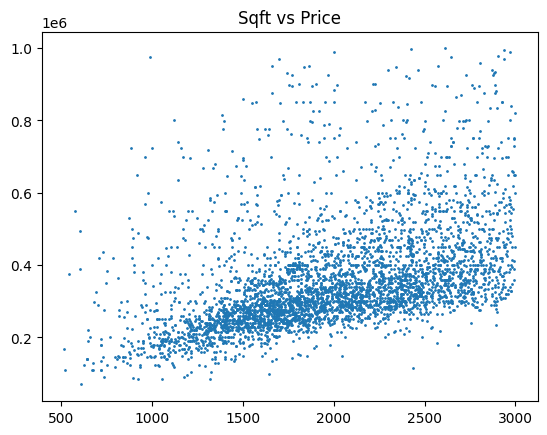

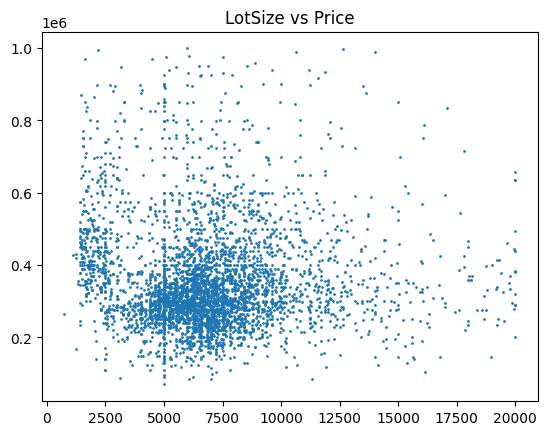

Number of data points included: 4300


In [5]:
plt.title("Sqft vs Price")
plt.scatter(data[:, squareFootage_i], data[:, price_i], s=1)
plt.show()
plt.title("LotSize vs Price")
plt.scatter(data[:, lotSize_i], data[:, price_i], s=1)
plt.show()
print("Number of data points included:", len(data))

# Run Mulitvar Gradient Descent

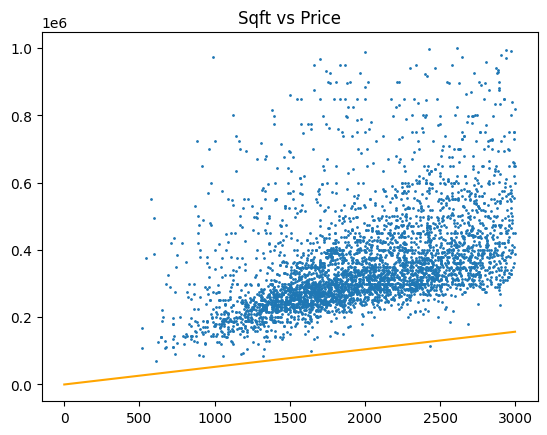

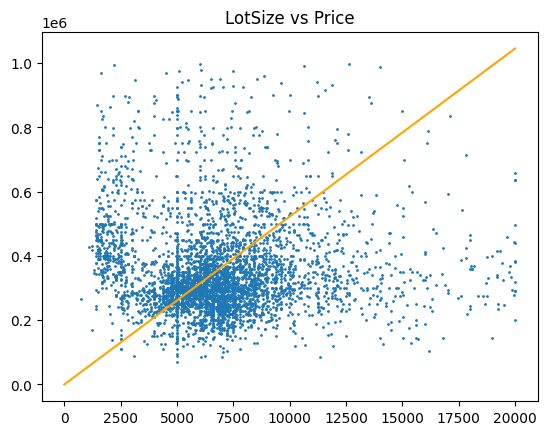

theta0=		 [0.007]
theta1 lotSize=	 [36.913]
theta2 sqft=	 [15.381]


In [8]:
def sgd(X, Y, training_rate=0.00000000001, iters=1):
    n_features = len(X[0])
    theta = np.zeros((n_features, 1))


    for _ in range(iters):
        for x, y in zip(X, Y):
            y_pred = theta.T @ x
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (y_pred - y) * x 

    # plot    
    lotSize_x = np.arange(0, np.amax(data[:, lotSize_i]))
    squareFootage_x = np.arange(0, np.amax(data[:, squareFootage_i]))
    
    plt.title("Sqft vs Price")
    plt.scatter(data[:, squareFootage_i], data[:, price_i], s=1)
    plt.plot(squareFootage_x, theta[2, 0] * squareFootage_x + theta[1, 0] * squareFootage_x + theta[0, 0], c='orange')
    plt.show()
    plt.title("LotSize vs Price")
    plt.scatter(data[:, lotSize_i], data[:, price_i], s=1)
    plt.plot(lotSize_x, theta[2, 0] * lotSize_x + theta[1, 0] * lotSize_x + theta[0, 0], c='orange')
    plt.show()

    return theta


filteredData = np.ones((len(data[:, 1]), 1))
filteredData = np.hstack((filteredData, np.array([data[:, lotSize_i]]).T)) # append lot size column
filteredData = np.hstack((filteredData, np.array([data[:, squareFootage_i]]).T)) # append square footage column

theta = sgd(filteredData, data[:, price_i])

print("theta0=\t\t", np.around(theta[0], decimals=3))
print("theta1 lotSize=\t", np.around(theta[1], decimals=3))
print("theta2 sqft=\t", np.around(theta[2], decimals=3))

# Check Database for Underpriced Houses Based on Lot Size and Square Footage

In [6]:
# Filter out unactive listings and listings without lotsize and square footage
lotSizeAndSqftData = []
lotSizeAndSqftStrData = []
for d, str_d in zip(temp_data, temp_stringData):
    if d[lotSize_i] > 0 and d[squareFootage_i] > 0 and d[squareFootage_i] < 3000 and str_d[propertyType_i] == "Single Family" and str_d[status_i] == 'Active' and d[lotSize_i] < 20000:
        lotSizeAndSqftData.append(d)
        lotSizeAndSqftStrData.append(str_d)

pricingErrors = []
for d, str_d in zip(lotSizeAndSqftData, lotSizeAndSqftStrData):
    lotSize = d[lotSize_i]
    squareFootage = d[squareFootage_i]
    price = d[price_i]
    address = str_d[address_i]

    x = np.array([[1], [lotSize], [squareFootage]])
    y_pred = theta.T @ x
    error = price - y_pred
    pricingErrors.append({'error': error[0][0], 'address': address, 'estimation':y_pred[0][0], 'price': price, 'squareFootage': squareFootage, 'lotSize': lotSize})

pricingErrors = sorted(pricingErrors, key=lambda d: d['error'])

print("{: <20} {: <20} {: <20} {: <20} {: <20} {: <20} ".format("Error", "Estimation", "Price", "SquareFootage", "LotSize", "Address"))
for listing in pricingErrors:
    error = round(listing['error'])
    estimation = round(listing['estimation'])
    price = round(listing['price'])
    squareFootage = round(listing['squareFootage'])
    lotSize = round(listing['lotSize'])
    address = listing['address']
    
    print("{: <20} {: <20} {: <20} {: <20} {: <20} {: <20}".format(error, estimation, price, squareFootage, lotSize, address))

Error                Estimation           Price                SquareFootage        LotSize              Address              
-318599              433499               114900               2434                 7022                 976 Marjorie St     
-301295              481195               179900               2682                 9278                 S781005 Peach Creek For Peach Creek Frst
-282364              517364               235000               2895                 9121                 5419 Bent Bough Ln  
-274450              459350               184900               2568                 8276                 901 N Jones St      
-246522              486422               239900               2753                 6242                 4223 Brookhead Trl  
-244635              463635               219000               2586                 8799                 12103 Fairbury Dr   
-240193              440192               199999               2486                 6050         

# Get Price Estimation of Your House Using Hypothesis

In [7]:
lotSize = float(input("Enter your house's lot size") or 7000)
squareFootage = float(input("Enter your house's square footage") or 2100)

x = np.array([
    [1],
    [lotSize],
    [squareFootage],
])

price_estimate = theta.T @ x
print("Esimated price based on inputs:", f"${round(price_estimate[0][0])}")


Esimated price based on inputs: $376169
